# CSE-221710304041-VENKANNA BABU

# Mobile Price Classification

**Problem Statement :**

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

**Datasets :**

The dataset is taken from the kaggle. The dataset contains several attributes of mobile phone features
https://www.kaggle.com/iabhishekofficial/mobile-price-classification


In this data the attributes given are and there explanations:
- id:ID
- battery_power:Total energy a battery can store in one   time       measured in mAh
- blue:Has bluetooth or not
- clock_speed:speed at which microprocessor executes instructions
- dual_sim:Has dual sim support or not
- fc:Front Camera mega pixels
- four_g:Has 4G or not
- int_memory:Internal Memory in Gigabytes
- m_dep:Mobile Depth in cm
- mobile_wt:Weight of mobile phone
- n_cores:Number of cores of processor
- pc:Primary Camera mega pixels
- px_height:Pixel Resolution Height
- px_width:Pixel Resolution Width
- ram:Random Access Memory in Megabytes
- sc_h:Screen Height of mobile in cm
- sc_w:Screen Width of mobile in cm
- talk_time:longest time that a single battery charge will - last when you are
- three_g:Has 3G or not
- touch_screen:Has touch screen or not
- wifi:Has wifi or not

**USES:**
- This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
- Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

## 1.Importing packages

In [8]:
import numpy as np # import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Know the versions of packages

In [9]:
import numpy
import matplotlib
print('numpy:',numpy.__version__)
print('pandas:',pd.__version__)
print('seaborn:',sns.__version__)
print('matplotlib:',matplotlib.__version__)

numpy: 1.18.5
pandas: 1.0.5
seaborn: 0.10.1
matplotlib: 3.2.2


In [10]:
df_train=pd.read_csv('https://raw.githubusercontent.com/venkanna831/AIML/master/Project/train.csv')#loading the data set

In [11]:
df_train.head()#train data set

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
df_train.describe().T #description

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


**Observations:-**

1.2000mah is the max Battery Power

2.Dual sim is available for 75% of the phones

3.50% of the mobile phones has 32gb of memory

4.most of the mobile phones are screen touch enabled and supports 3g , 4g and are wifi enabled

In [13]:
df_train.dtypes # datatypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [14]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in the dataseet

In [15]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Categorical columns in the dataset**



In [16]:
df_train.select_dtypes(exclude=['int64', 'float64']).columns

Index([], dtype='object')

**Numerical columns in the dataset**

In [17]:
df_train.select_dtypes(include=['int64', 'float64']).columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Size of the target variable**

In [18]:
df_train.groupby('price_range').size()

price_range
0    500
1    500
2    500
3    500
dtype: int64

## 2.Visualization

**Correlation**

In [19]:
df_train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


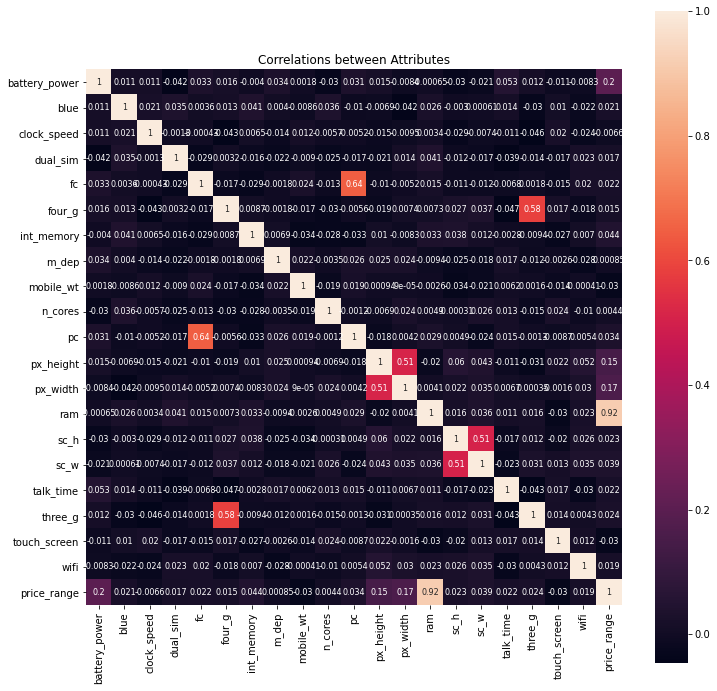

In [21]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(df_train.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

**Observations of heatmap:**
- the most influential variable is ram
- having 3G and 4G is somewhat correlated
- most of the variables have very little correlation to price range
- primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect prige range.
- there is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

**Relation between attributes:**

- Price range vs. ram has high positive correlation
- fc vs. pc has positive correlation
- four_g vs. three_g has positive correlation
- pc_height vs. pc_width has positive correlation

**Price range vs Internal Memory**

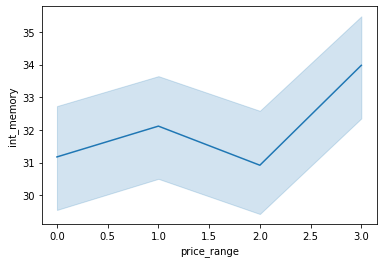

In [22]:
sns.lineplot(y="int_memory", x="price_range", data=df_train)

**LinePlot:-**
- In the above graph the internal memory depends on the price range as the price increases the memory size increases

**Effect of ram on price**

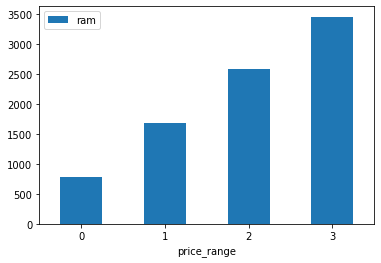

In [23]:
df_train.groupby('price_range').mean()['ram'].plot(kind = 'bar', legend = True).tick_params(axis = 'x', labelrotation = 360)

Here,we can see :

- The price_range 3 having  more RAM
- The price_range  0 having low RAM

**Bluetooth,Wifi vs price**

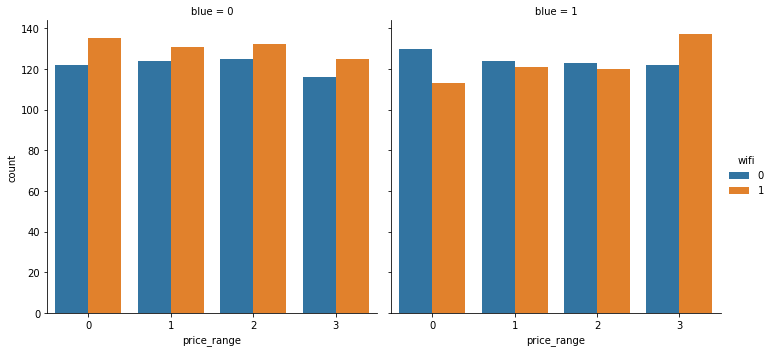

In [24]:
sns.catplot('price_range', col='blue',hue = 'wifi',data = df_train,  kind = 'count', col_wrap=2)

Observation-
- Bluetooth and Wifi seem to not have a significant affect to phone price since they have similar distribution in every price range.

**% of Phones which support 3G**

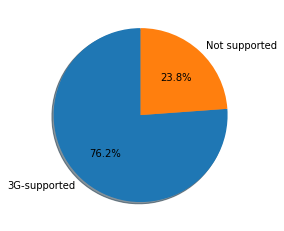

In [25]:
labels = ["3G-supported",'Not supported']
values=df_train['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Observation
- 76.2% of phones support 3g
- 23.8% of phones donot support 3g

**% of Phones which support 4G**

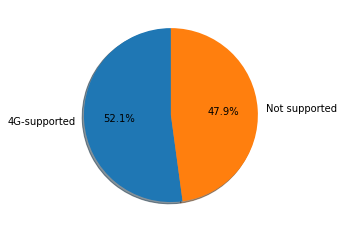

In [26]:
labels4g = ["4G-supported",'Not supported']
values4g = df_train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Observation
- 52.1% of phones support 4g
- 47.9% of phones donot support 4g

**Dualsim Support**

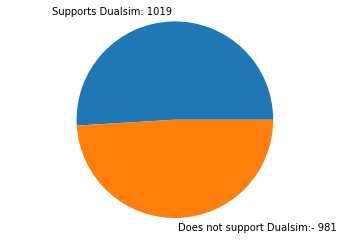

In [27]:
x=df_train['dual_sim'].value_counts()
labels='Supports Dualsim: '+str(x[1]),'Does not support Dualsim:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')
plt.show()

Observation
- 1019 phones support dualsim
- 981 phones donot support dualsim

**Battery power vs Price Range**

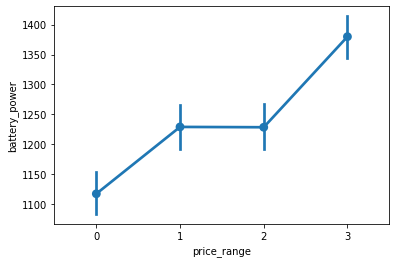

In [28]:
sns.pointplot(x="price_range", y="battery_power", data=df_train)

**Observations:-**
    
- when price_range is 3 then battery power greater than 1600 MAH
- when price_range is 2 then battery power greater is 1600 MAH
- when price_range is 1 then battery power is 1500 MAH
- when price_range is 0 then battery power is 1400 MAH

**Touch screen vs Price_range**

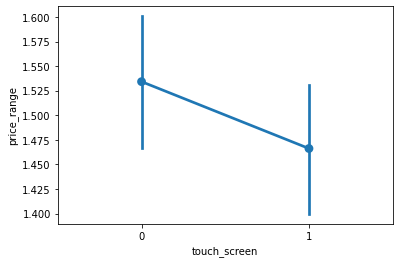

In [29]:
sns.pointplot(x='touch_screen',y='price_range',data=df_train)
plt.show()

Observation:
- The mobiles which have touch screen are more costlier

**No of Phones vs Camera megapixels of front and primary camera :**

Text(0.5, 0, 'MegaPixels')

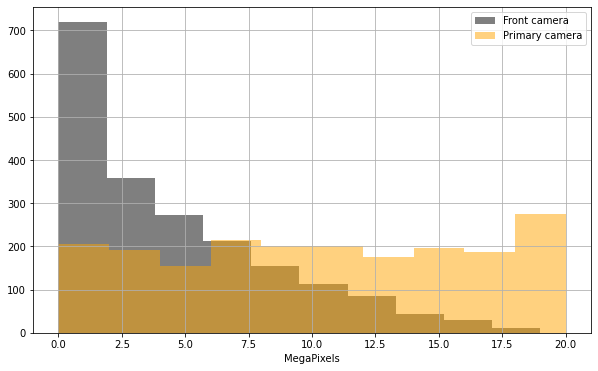

In [30]:
plt.figure(figsize=(10,6))
df_train['fc'].hist(alpha=0.5,color='black',label='Front camera')
df_train['pc'].hist(alpha=0.5,color='orange',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

**EDA observation:**
- ram has direct impact on the price range of the phones
- Features like

1.3g

2.4g

3.Dual sim

4.wifi

5.Touch screen
- these have more impact on the phones prices

## 3.Training and testing the data

Steps to be followed:
- completion of preprocessing steps
- Next we have to split the data into train and test datasets and check the accuracy
- Here we test with the following algorithm logistic regression, logistic regression with scalling, Decision Tree, Random Forest

In [31]:
y = df_train['price_range']#input
X = df_train.drop('price_range', axis = 1)#output

Price range target values

In [32]:
y.unique()#we have four price ranges

array([1, 2, 3, 0])

In [33]:
from sklearn.model_selection import train_test_split # importing sklearn packages
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 101)

In [35]:
print(X_train.shape) #shapes
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 20)
(400, 20)
(1600,)
(400,)


**Training and Testing the logistic regresssion without scaling**

In [36]:
from sklearn.linear_model import LogisticRegression 

In [37]:
lr = LogisticRegression(multi_class = 'ovr', solver = 'sag',  max_iter = 10000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred_lr_11 = lr.predict(X_test)#predicting x test

In [39]:
y_pred_lr_12 = lr.predict(X_train)#predicting x train

**Tesing the data**

In [40]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr_11)
confusion_matrix

array([[82, 11,  1,  0],
       [25, 49, 23,  5],
       [ 0, 21, 54, 45],
       [ 0,  4,  8, 72]])

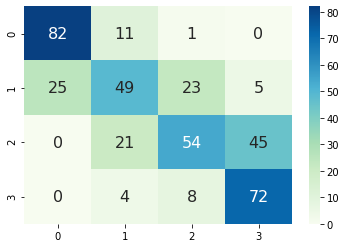

In [42]:

sns.heatmap(confusion_matrix,annot=True,annot_kws={"size": 16}, fmt='g',cmap="GnBu") #test heatmap

**Training the data**

In [43]:
confusion_matrix_1 = metrics.confusion_matrix(y_train, y_pred_lr_12)
confusion_matrix_1

array([[373,  27,   6,   0],
       [ 78, 217,  80,  23],
       [  2,  81, 138, 159],
       [  0,   3,  31, 382]])

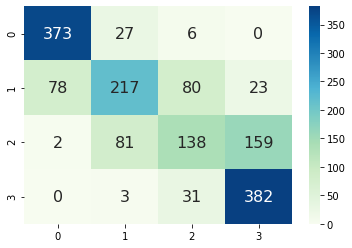

In [44]:
sns.heatmap(confusion_matrix_1,annot=True,annot_kws={"size": 16}, fmt='g',cmap="GnBu") #test heatmap

In [45]:
print(classification_report(y_test, y_pred_lr_11)) #test classsification report

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        94
           1       0.58      0.48      0.52       102
           2       0.63      0.45      0.52       120
           3       0.59      0.86      0.70        84

    accuracy                           0.64       400
   macro avg       0.64      0.66      0.64       400
weighted avg       0.64      0.64      0.63       400



In [46]:
print(classification_report(y_train, y_pred_lr_12)) #train classification report

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       406
           1       0.66      0.55      0.60       398
           2       0.54      0.36      0.43       380
           3       0.68      0.92      0.78       416

    accuracy                           0.69      1600
   macro avg       0.68      0.69      0.67      1600
weighted avg       0.68      0.69      0.67      1600



In [47]:
y_pred_proba_3 = lr.predict_proba(X_test) #roc predict

**Roc curve for logistic regression without Scaling**

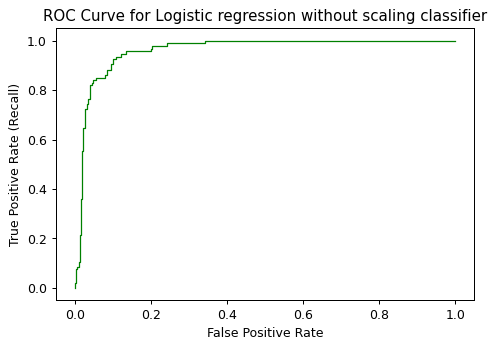

In [48]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_3[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=90)
plt.plot(fpr, tpr, lw=1, color='green')
plt.title('ROC Curve for Logistic regression without scaling classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

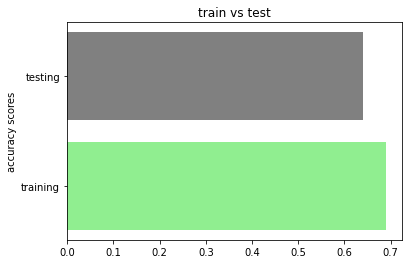

In [ ]:
models = ['training','testing']
acc_scores = [0.69,0.64]
plt.barh(models, acc_scores, color=['lightgreen', 'grey' ])
plt.ylabel("accuracy scores")
plt.title("train vs test")
plt.show()

Observations:
- Training accuracy in logistic regression: 69%

- Testing accuracy in logistic regression:64% 

**Scaling the data**

In [49]:
from sklearn.preprocessing import StandardScaler#importing packages
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler().fit(X_train)

In [50]:
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))
scaled_X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.984823,-0.986343,0.345546,0.990050,-0.066906,-1.053953,-1.156036,0.653456,-0.451426,0.646912,-0.312840,-0.841894,0.512558,1.507969,0.645076,0.043393,0.176984,0.563877,-0.998751,-1.012579
1,-0.673224,1.013846,-1.250227,-1.010051,-0.766578,0.948808,1.044235,-1.416900,0.114337,-1.102237,0.849672,-1.018037,-0.852864,0.724930,1.120599,-1.094793,-0.937146,0.563877,1.001251,0.987577
2,-0.400668,1.013846,0.222795,0.990050,-0.999802,-1.053953,1.429282,-0.036663,-0.140256,1.084199,-1.641426,-1.275477,-1.329604,-1.295786,-0.068208,0.726305,0.919738,-1.773437,1.001251,-1.012579
3,1.545834,-0.986343,-1.250227,-1.010051,-0.300130,0.948808,1.704316,-0.726781,-0.819173,-1.102237,0.019306,-1.178372,-1.318033,1.189631,0.169554,-0.639519,1.476803,0.563877,-0.998751,-1.012579
4,-1.359156,-0.986343,-1.250227,-1.010051,-0.766578,-1.053953,0.494167,1.688634,1.613611,1.084199,0.019306,-0.715433,-1.563346,0.767924,-0.068208,0.726305,-1.308523,0.563877,1.001251,0.987577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-0.175810,1.013846,-1.250227,-1.010051,0.632766,-1.053953,1.484289,-0.036663,-1.696107,-1.539524,0.185379,-0.467026,-1.429118,1.614082,-1.019253,0.043393,-0.751458,0.563877,-0.998751,0.987577
1596,-0.455179,-0.986343,1.450313,-1.010051,-0.300130,-1.053953,-0.165914,-1.071840,-1.611242,1.521486,1.181819,0.549184,-0.838978,-0.859443,-1.732537,-0.639519,-0.565769,0.563877,-0.998751,-1.012579
1597,0.694097,1.013846,-0.022709,0.990050,-0.999802,0.948808,-0.275928,-0.381722,-0.762597,0.209625,-0.478914,-0.026668,-0.216438,-1.542772,-0.543730,0.498668,-0.008704,0.563877,-0.998751,-1.012579
1598,0.834918,-0.986343,-1.250227,0.990050,-0.066906,0.948808,-0.275928,1.343574,1.670188,-1.539524,0.019306,-1.085784,-0.565894,0.874037,0.645076,-0.867156,-0.937146,0.563877,-0.998751,0.987577


In [51]:
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test))#scaled data
scaled_X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.342699,-1.005013,-1.264622,-1.056599,1.232482,0.995012,0.546668,-0.952194,-1.418952,-1.537778,1.599113,0.574258,-0.719246,-0.515779,-0.090880,-1.333665,0.543941,0.542677,-1.035635,-1.020204
1,-1.402675,-1.005013,-1.264622,-1.056599,-0.308120,-1.005013,-0.342901,-0.594562,-1.362658,-0.227172,-0.971679,0.643609,1.650558,-0.252633,-0.326931,1.048943,0.543941,0.542677,0.965592,0.980196
2,-1.455565,-1.005013,-0.167336,0.946433,1.232482,0.995012,-1.343667,0.120701,0.016536,1.520303,0.635066,-1.195289,-1.476749,0.998267,-0.799034,0.334161,-0.150636,0.542677,-1.035635,0.980196
3,-0.089620,0.995012,-0.411177,-1.056599,0.132052,0.995012,0.991453,1.908858,0.072830,-0.227172,1.599113,0.614526,0.038257,-0.635912,-1.271137,-0.618882,1.585806,0.542677,0.965592,0.980196
4,-0.742698,-1.005013,-0.655019,0.946433,-0.308120,0.995012,-1.566059,-0.594562,-0.856015,-1.537778,-0.971679,1.630171,0.540943,-1.021097,-0.090880,1.048943,-1.192502,0.542677,0.965592,0.980196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.637231,0.995012,-1.264622,0.946433,-0.748293,-1.005013,-0.009313,0.120701,-0.011611,1.083434,0.153042,0.639134,0.376470,-0.408995,1.089378,-1.333665,-1.018858,0.542677,0.965592,0.980196
396,-0.229894,-1.005013,-1.264622,0.946433,-0.968379,0.995012,-0.509695,-0.236931,0.635767,-0.227172,-1.453702,0.381868,-0.742411,1.324341,-1.271137,-0.380622,-0.671569,0.542677,-1.035635,-1.020204
397,-0.549534,0.995012,-1.264622,-1.056599,-0.968379,0.995012,0.046285,1.551226,0.523179,0.646566,-1.614377,0.800206,1.210418,0.130646,-1.271137,-0.142361,-1.192502,0.542677,0.965592,-1.020204
398,-1.200313,-1.005013,1.417632,0.946433,0.132052,0.995012,-0.676490,-0.236931,0.889088,-1.100909,-0.650330,-0.385458,0.559475,-1.784795,-0.090880,0.095900,-1.192502,0.542677,0.965592,0.980196


**Training and Testing the logistic regression with scaled data**

In [52]:
from sklearn.linear_model import LogisticRegression#importing the packages

In [53]:
lr1 = LogisticRegression(multi_class = 'ovr', solver = 'sag',  max_iter = 10000)

In [54]:
lr1.fit(scaled_X_train, y_train)# fitting the data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_train_pred_lr = lr1.predict(scaled_X_train)#predicting scale x train

In [56]:
y_train_pred_lr

array([3, 2, 0, ..., 0, 3, 0])

**Testing**

In [57]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred_lr) #train
confusion_matrix 

array([[406,   0,   0,   0],
       [ 29, 297,  72,   0],
       [  0,  78, 272,  30],
       [  0,   0,   1, 415]])

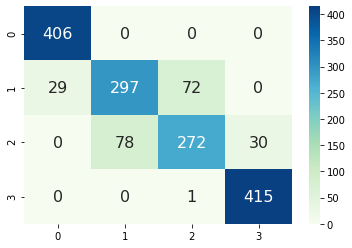

In [58]:
sns.heatmap(confusion_matrix,annot=True,annot_kws={"size": 16}, fmt='g',cmap="GnBu") #train heatmap

**Training**

In [59]:
print(classification_report(y_train, y_train_pred_lr))#train classification report

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       406
           1       0.79      0.75      0.77       398
           2       0.79      0.72      0.75       380
           3       0.93      1.00      0.96       416

    accuracy                           0.87      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.86      0.87      0.86      1600



In [60]:
y_test_pred_lr = lr1.predict(scaled_X_test)#test prediction

In [61]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred_lr)
confusion_matrix# test confusion matrix

array([[93,  1,  0,  0],
       [10, 71, 21,  0],
       [ 0, 22, 82, 16],
       [ 0,  0,  0, 84]])

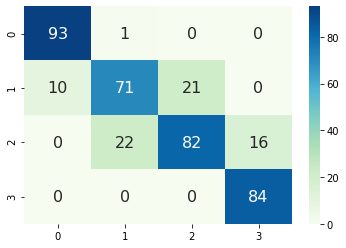

In [63]:
sns.heatmap(confusion_matrix,annot=True,annot_kws={"size": 16}, fmt='g',cmap="GnBu") #test heatma

In [64]:
print(classification_report(y_test, y_test_pred_lr))# test classification report

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        94
           1       0.76      0.70      0.72       102
           2       0.80      0.68      0.74       120
           3       0.84      1.00      0.91        84

    accuracy                           0.82       400
   macro avg       0.82      0.84      0.83       400
weighted avg       0.82      0.82      0.82       400



In [65]:
acc_lr = metrics.accuracy_score(y_train, y_train_pred_lr) #train
acc_lr

0.86875

In [66]:
acc_lr = metrics.accuracy_score(y_test, y_test_pred_lr) #test
acc_lr

0.825

In [67]:
y_pred_proba_2 = lr1.predict_proba(scaled_X_test) #roc test

***Roc curve for logistic regression with Scaling***

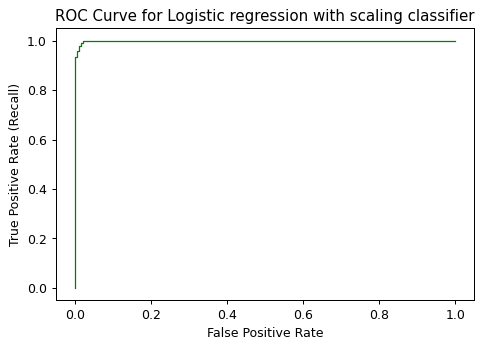

In [68]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_2[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=90)
plt.plot(fpr, tpr, lw=1, color='green')
plt.title('ROC Curve for Logistic regression with scaling classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

Training accuracy in  scaled logistic regression: 86%

Testing accuracy in scaled logistic regression:82% 

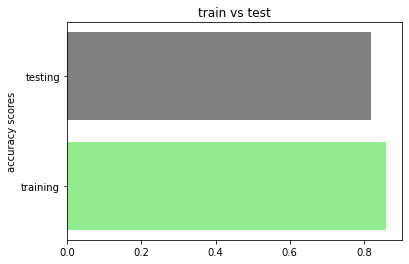

In [69]:
models = ['training','testing']
acc_scores = [0.86,0.82]
plt.barh(models, acc_scores, color=['lightgreen', 'grey' ])
plt.ylabel("accuracy scores")
plt.title("train vs test")
plt.show()

Observations:
- Training accuracy in scaled logistic regression: 86%

- Testing accuracy in scaled logistic regression:82% 

**Training and testing using Decision Tree**

In [70]:
from sklearn.tree import DecisionTreeClassifier # importing decision tree

In [71]:
dt = DecisionTreeClassifier(random_state=101,criterion='entropy')
dt_model = dt.fit(X_train, y_train)# fitting test and train

In [72]:
y_train_pred_dt=dt.predict(X_train)#predicting train

In [78]:
z=metrics.confusion_matrix(y_train,y_train_pred_dt)#confusioin matrix
z

array([[406,   0,   0,   0],
       [  0, 398,   0,   0],
       [  0,   0, 380,   0],
       [  0,   0,   0, 416]])

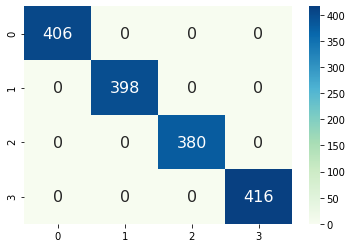

In [79]:
sns.heatmap(z,annot=True,annot_kws={"size": 16}, fmt='g',cmap="GnBu") #train heatmap

In [80]:
print(classification_report(y_train,y_train_pred_dt))# train classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      1.00      1.00       398
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       416

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



**Training**

In [82]:
accuracy_score(y_train,y_train_pred_dt)# train score

1.0

In [83]:
y_pred_dt = dt.predict(X_test) # predicting test

In [86]:
con_test_dt=metrics.confusion_matrix(y_test, y_pred_dt)
con_test_dt #test confusion matrix

array([[ 86,   8,   0,   0],
       [  7,  84,  11,   0],
       [  0,  10, 100,  10],
       [  0,   0,   6,  78]])

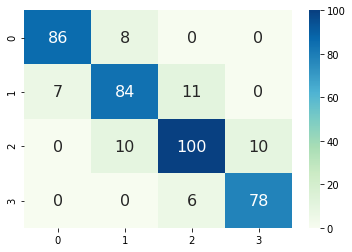

In [87]:
sns.heatmap(con_test_dt,annot=True,annot_kws={"size": 16}, fmt='g',cmap="GnBu") #test heatmap

In [88]:
print(metrics.classification_report(y_test, y_pred_dt))# test classification report

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        94
           1       0.82      0.82      0.82       102
           2       0.85      0.83      0.84       120
           3       0.89      0.93      0.91        84

    accuracy                           0.87       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.87      0.87      0.87       400



**Testing**

In [89]:
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)
acc_dt

0.87

In [90]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_pred_proba_1 = dt.predict_proba(X_test) #roc curve prediction

***Roc curve for Decision Tree***

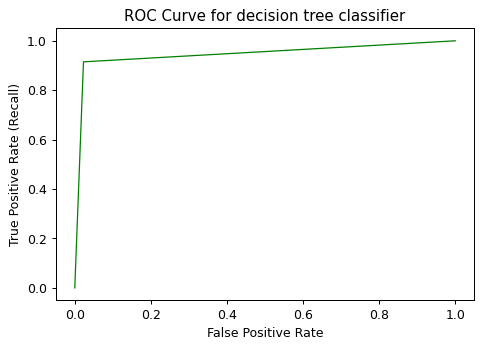

In [91]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_1[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=90)
plt.plot(fpr, tpr, lw=1, color='green')
plt.title('ROC Curve for decision tree classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

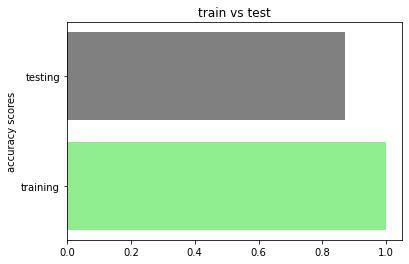

In [92]:
models = ['training','testing']
acc_scores = [1,0.87]
plt.barh(models, acc_scores, color=['lightgreen', 'grey' ])
plt.ylabel("accuracy scores")
plt.title("train vs test")
plt.show()

Observations:
- Training accuracy in Decision Tree: 100%

- Testing accuracy in Decision Tress:87% 

**Tree Visiualization:**

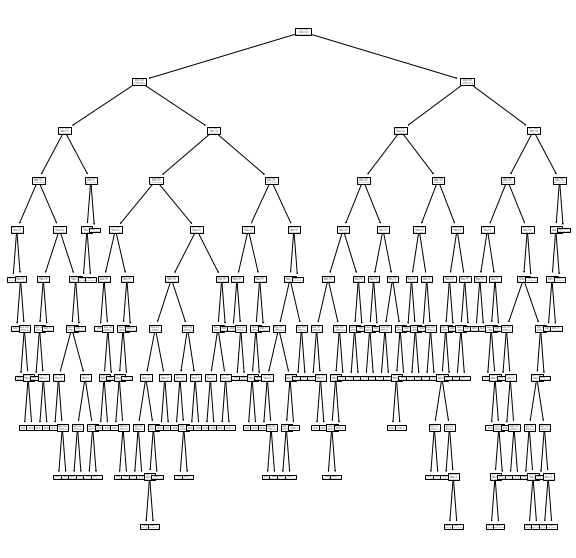

In [93]:
import matplotlib.pyplot as plt #import package
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dt)
plt.show()

**We use Grid Search cv to increse the testing accuracy in decision tree**

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
grid_params={
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth': range(1,11,2),
    'min_samples_leaf':range(1,6,3)
}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=dt,param_grid=grid_params)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'splitter': 'best'}

Building the model with parameters

In [95]:
final_model=DecisionTreeClassifier(criterion='entropy',
                                   max_depth=9,
                                   min_samples_leaf=6,
                                   splitter='best')
final_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predicting the test data

In [96]:
pred_test = final_model.predict(X_test)

classification report of actual values and predicted values(gridsearch)

In [97]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        94
           1       0.78      0.88      0.83       102
           2       0.91      0.77      0.83       120
           3       0.91      0.94      0.92        84

    accuracy                           0.87       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.87      0.87       400



**Testing Accuracy**

In [98]:
acc_dt = metrics.accuracy_score(y_test, pred_test)
acc_dt

0.8725

In grid based Cv Accuracy of decision tree testing accuracy is 87%

**Testing and training using Random Forest :**

In [99]:
#Import the RFC from sklearn
from sklearn.ensemble import RandomForestClassifier
# initialize the object for RFC
rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy', oob_score = True) 
model_rf = rf.fit(X_train, y_train)

In [100]:
y_pred_train_1113 = rf.predict(X_train)
#predicting randomforest x train
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, y_pred_train_1113))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      1.00      1.00       398
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       416

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



Prediction on test data

In [101]:
y_pred_rf = rf.predict(X_test)
y=metrics.confusion_matrix(y_test, y_pred_rf)
y

array([[ 87,   7,   0,   0],
       [  7,  85,  10,   0],
       [  0,  14, 100,   6],
       [  0,   0,   3,  81]])

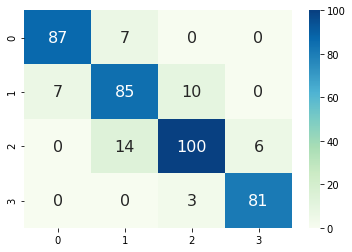

In [103]:
sns.heatmap(y,annot=True,annot_kws={"size": 16}, fmt='g',cmap="GnBu") #test heatmap

In [104]:
print(classification_report(y_test, y_pred_rf))# classification report

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        94
           1       0.80      0.83      0.82       102
           2       0.88      0.83      0.86       120
           3       0.93      0.96      0.95        84

    accuracy                           0.88       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.88      0.88      0.88       400



In [105]:
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)# test accuracy
acc_rf

0.8825

In [106]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_pred_proba = rf.predict_proba(X_test)#roc curve prediction

***Roc curve for Random Forest***

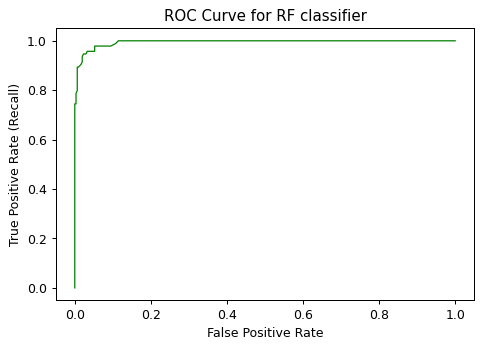

In [107]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=90)
plt.plot(fpr, tpr, lw=1, color='green')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

Testing accuracy of randomforest is 88%

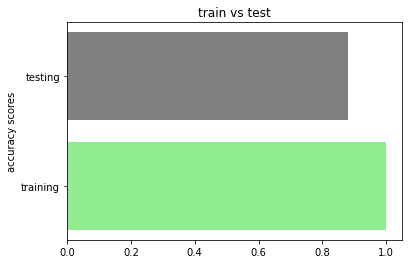

In [108]:
models = ['training','testing']
acc_scores = [1,0.88]
plt.barh(models, acc_scores, color=['lightgreen', 'grey' ])
plt.ylabel("accuracy scores")
plt.title("train vs test")
plt.show()

Observations:
- Training accuracy in Random Forest: 100%

- Testing accuracy in Random Forest:88% 

**Predicting the best algorith among logistic regression, sacled logistic regression, decision tree, random forest**

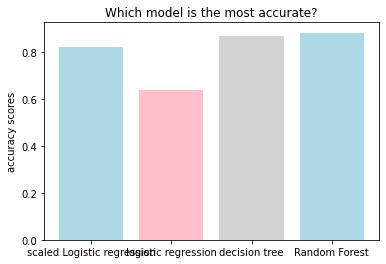

In [109]:
models = ['scaled Logistic regression','logistic regression', 'decision tree','Random Forest']
acc_scores = [0.82, 0.64, 0.87,0.882]
plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

Observations:
- Testing accuracy of logistic regression is 64%
- Testing accuracy of scaled logistic regression is 82%
- Testing accuracy of Decision tree is 87%
- Testing accuracy of Random Forest is 88%

Here we got highest accuracy for Random Forest 

**So we choose Random Forest Algorithm**

**Prediction on testing dataset**

In [110]:
df_test=pd.read_csv('https://raw.githubusercontent.com/venkanna831/AIML/master/Project/test.csv')

In [111]:
df_test.head()# test head

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


**Drop the id column**

In [112]:
# We did not have 'id' column in the traning and validation datasets, so, we delete it from test dataset to make the dimension of input dataset same
df_test=df_test.drop('id',axis=1)

In [113]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [114]:
predicted_price_range = rf.predict(df_test)# predicting test

In [115]:
predicted_price_range# predicted price range

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 1, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

**Adding the new column "price_range" in the test dataset**

In [116]:
df_test['price_range'] = predicted_price_range#new column price range is added

In [117]:
df_test.head() #new column price range is added 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1


In [118]:
df_train['price_range'] #shows particular column

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

**New predicted column is added price_range in test dataset according to features price range varies from 0,1,2,3**

**Here, is a example of ram vs price range of test dataset**

In [119]:
pd.DataFrame({'ram' : df_test['ram'],'price_range' : predicted_price_range})# comparison

,ram,price_range
0,3476,3
1,3895,3
2,2396,2
3,3893,3
4,1773,1
...,...,...
995,2121,2
996,1933,1
997,1223,0
998,2509,2


- If ram is 3476 then price range is classified has 3
- It is similar to train dataset

**conclusion**

- Random forest is used for predicting the train dataset because we used accuracy Score as metric.In, all the algorithms we used Random forest has highest accuracy score.So,it classifies the test dataset correctly


so, Bob has classified price range indicating how high the price is and starts opening his new shop